In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
path="../posteriors/"

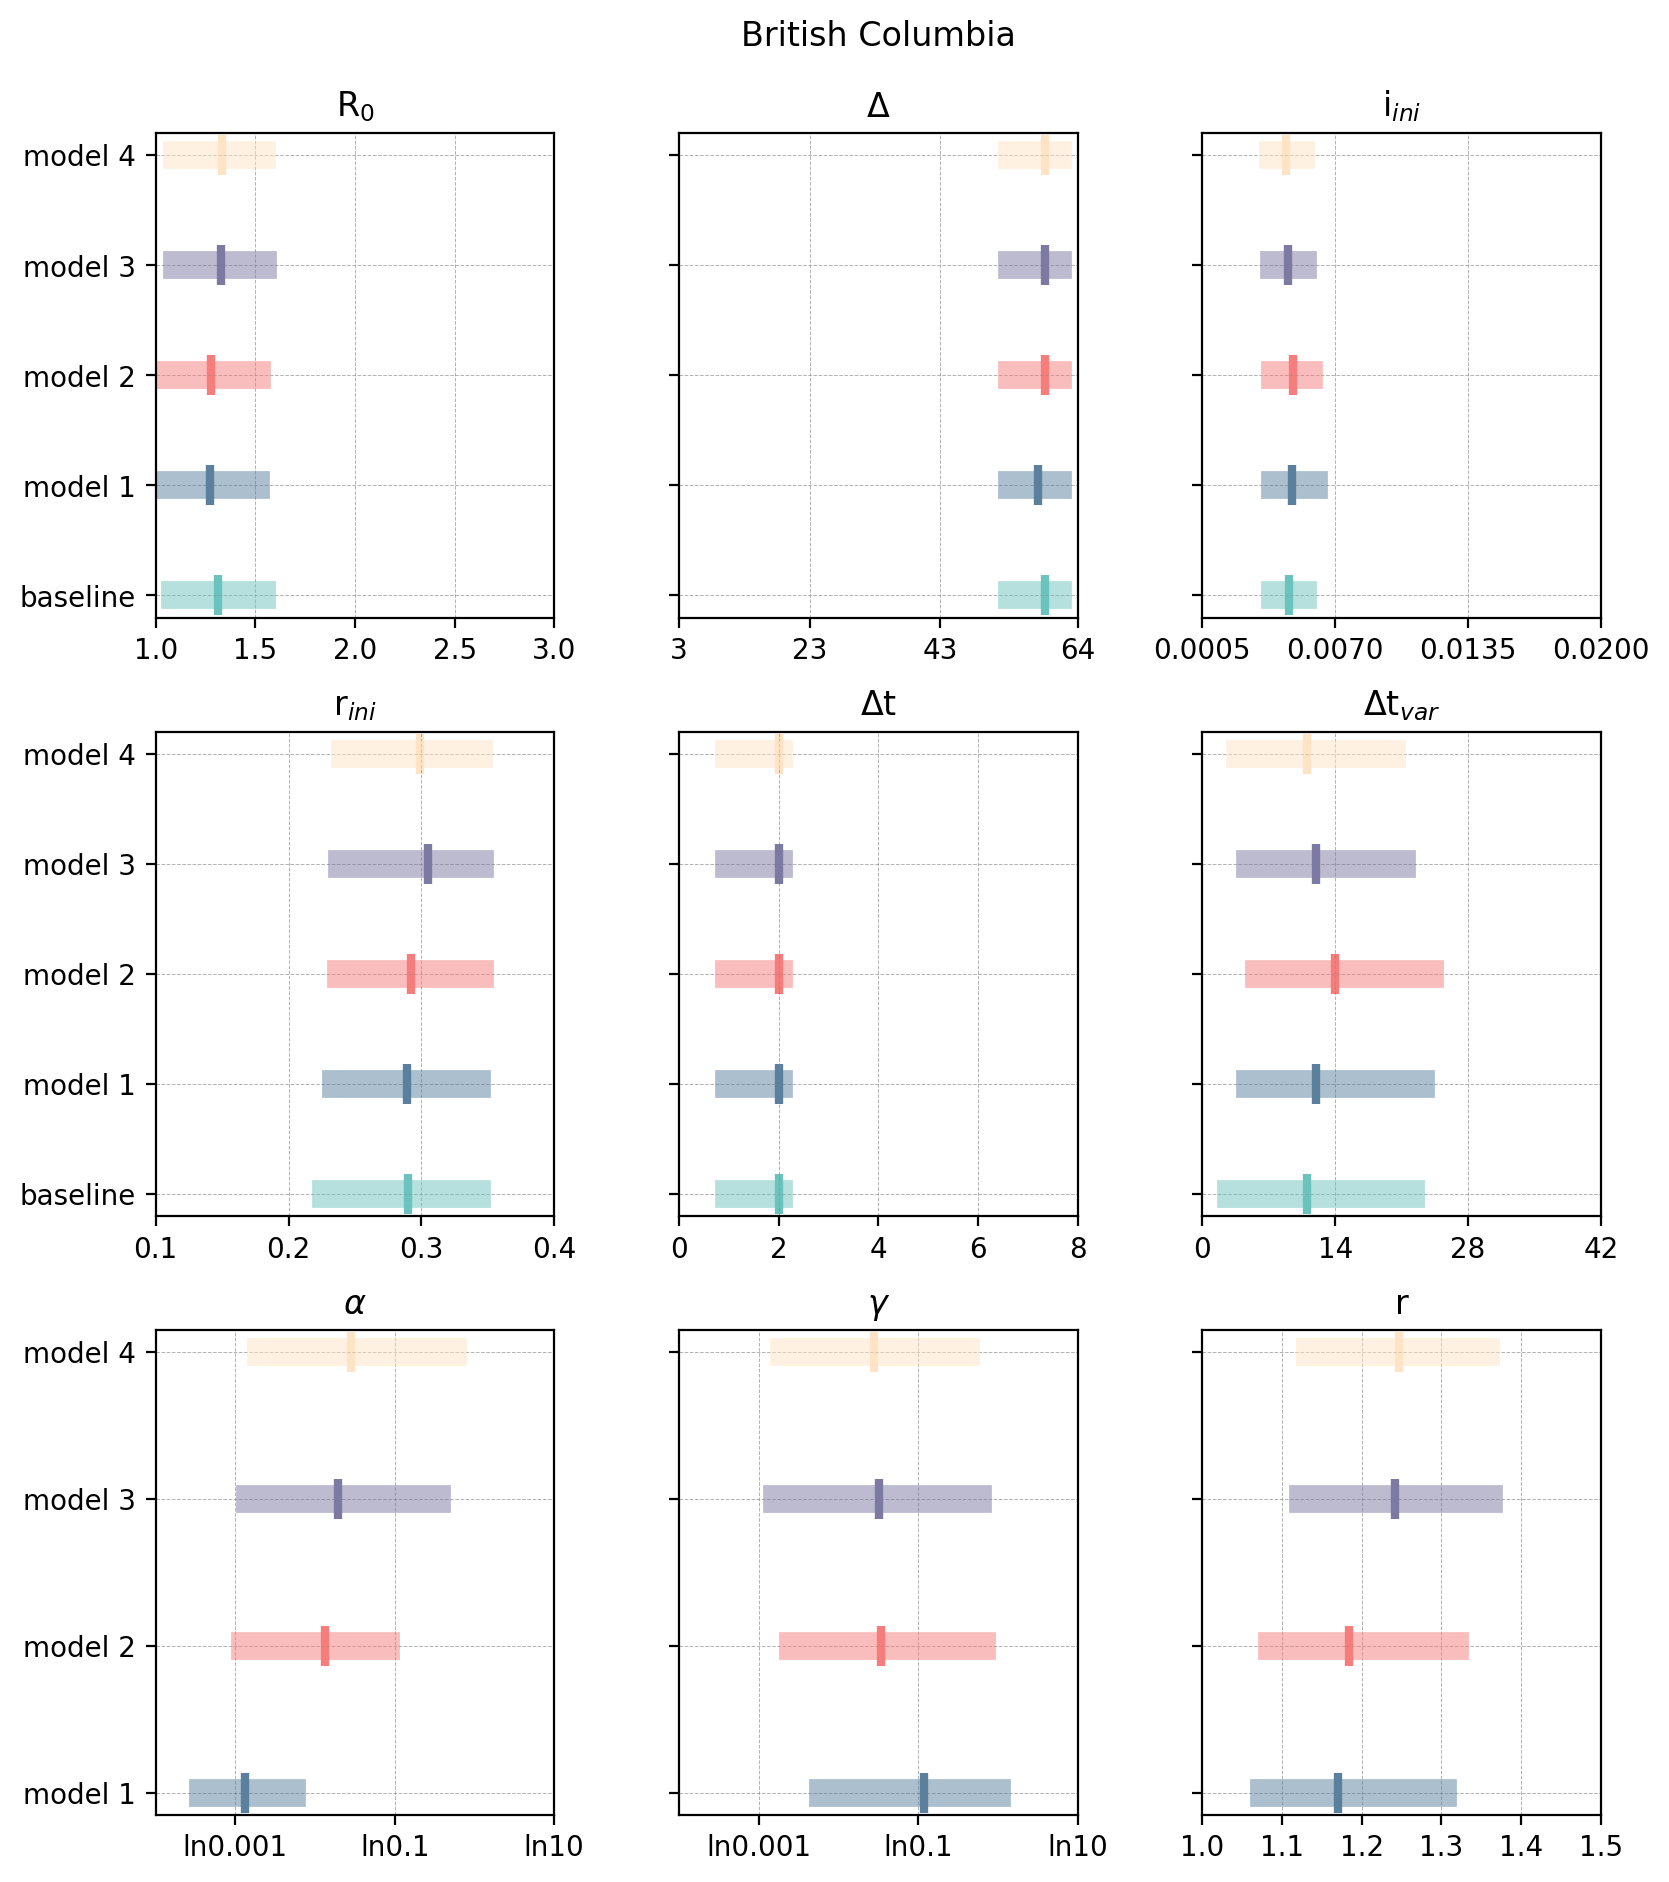

In [3]:
region='British Columbia'
files = os.listdir(path)
files = [file for file in files if ".csv" in file and region in file]
fig, axes = plt.subplots(ncols=3, nrows=3, dpi=200, figsize=(8,9))
fig.tight_layout(h_pad=2)
colors = ['#6CC2BD', '#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4', \
          '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
models = [ "baseline", "model 1", "model 2", "model 3", "model 4"]

i=0
for file in files:
    pos=pd.read_csv(f"{path}/{file}")
    D=pos['Delta']
    R0=pos['R0']
    r0=pos['r0_q']
    i0=pos['i0_q']
    t0=8-pos['start_week_delta']
    t_alpha=42-pos['t_alpha_delta']
    
    Q1, Q3 = np.quantile(R0, q=0.25), np.quantile(R0, q=0.75)
    Q1, Q3 = np.quantile(R0, q=0.05), np.quantile(R0, q=0.95)
    IQR    = Q3 - Q1
    axes[0][0].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[0][0].scatter([np.median(R0)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    Q1, Q3 = np.quantile(D, q=0.25), np.quantile(D, q=0.75)
    Q11, Q33 = np.quantile(D, q=0.05), np.quantile(D, q=0.95)
    IQR    = Q3 - Q1
    axes[0][1].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[0][1].scatter([np.median(D)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(i0, q=0.25), np.quantile(i0, q=0.75)
    Q11, Q33 = np.quantile(i0, q=0.05), np.quantile(i0, q=0.95)
    IQR    = Q3 - Q1
    axes[0][2].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[0][2].scatter([np.median(i0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(r0, q=0.25), np.quantile(r0, q=0.75)
    Q11, Q33 = np.quantile(r0, q=0.05), np.quantile(r0, q=0.95)
    IQR    = Q3 - Q1
    axes[1][0].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[1][0].scatter([np.median(r0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(t0, q=0.25), np.quantile(t0, q=0.75)
    Q11, Q33 = np.quantile(t0, q=0.05), np.quantile(t0, q=0.95)
    IQR    = Q3 - Q1
    axes[1][1].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[1][1].scatter([np.median(t0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(t_alpha, q=0.25), np.quantile(t_alpha, q=0.75)
    Q11, Q33 = np.quantile(t_alpha, q=0.05), np.quantile(t_alpha, q=0.95)
    IQR    = Q3 - Q1
    axes[1][2].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[1][2].scatter([np.median(t_alpha)], [i], color=colors[i], marker="|", s=200, linewidth=3)    
    i+=1
axes[0][0].set_title("R$_0$")
axes[0][1].set_title("$\\Delta$")
axes[0][2].set_title("i$_{ini}$")
axes[1][0].set_title("r$_{ini}$")
axes[1][1].set_title("$\Delta$t")
axes[1][2].set_title("$\Delta$t$_{var}$")

axes[0][0].set_xlim(1.0, 3.0)
axes[0][1].set_xlim(3, 64)
axes[0][2].set_xlim(5*10**(-4), 2*10**(-2))
axes[1][0].set_xlim(0.1, 0.4)
axes[1][1].set_xlim(0,8)
axes[1][2].set_xlim(0,42)

axes[0][1].set_xticks([3, 23, 43, 64])
axes[0][2].set_xticks([5*10**(-4), 0.0070, 0.0135, 2*10**(-2)])
axes[1][0].set_xticks([0.1, 0.2, 0.3, 0.4])
axes[1][1].set_xticks([0,2,4,6,8])
axes[1][2].set_xticks([0, 14, 28, 42])

for i in range(0,2):
    for j in range(1,3):
        axes[i][j].set_yticks([0,1,2,3,4]) # 设置刻度
        axes[i][j].set_yticklabels('')
axes[0][0].set_yticks([0,1,2,3,4]) # 设置刻度
axes[1][0].set_yticks([0,1,2,3,4]) # 设置刻度
#axes[i].set_yticklabels('')
axes[0][0].set_yticklabels(models)
axes[1][0].set_yticklabels(models)


files  = os.listdir(path)
files = [file for file in files if ".csv" in file and region in file and "_06_" not in file]

colors = ['#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4', \
          '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
models = ["model 1", "model 2", "model 3", "model 4"]
i=0
for file in files:
    pos=pd.read_csv(f"{path}/{file}")
    alpha=pos['alpha']
    gamma=pos['gamma']
    r=pos['r']

    Q1, Q3 = np.quantile(alpha, q=0.25), np.quantile(alpha, q=0.75)
    Q11, Q33 = np.quantile(alpha, q=0.05), np.quantile(alpha, q=0.95)
    IQR    = Q3 - Q1
    axes[2][0].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[2][0].scatter([np.median(alpha)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    Q1, Q3 = np.quantile(gamma, q=0.25), np.quantile(gamma, q=0.75)
    Q11, Q33 = np.quantile(gamma, q=0.05), np.quantile(gamma, q=0.95)
    IQR    = Q3 - Q1
    axes[2][1].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[2][1].scatter([np.median(gamma)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(r, q=0.25), np.quantile(r, q=0.75)
    Q11, Q33 = np.quantile(r, q=0.05), np.quantile(r, q=0.95)
    IQR    = Q3 - Q1
    axes[2][2].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[2][2].scatter([np.median(r)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    i+=1

axes[2][0].set_title("$\\alpha$")
axes[2][1].set_title("$\\gamma$")
axes[2][2].set_title("r")
axes[2][0].set_xlim(math.log(0.0001), math.log(10))
axes[2][1].set_xlim(math.log(0.0001), math.log(10))
axes[2][2].set_xlim(1.0, 1.5)


xticks = [np.log(0.001), np.log(0.1), np.log(10)]
xtick_labels = ['ln0.001', 'ln0.1', 'ln10']

axes[2][0].set_xticks(xticks)
axes[2][0].set_xticklabels(xtick_labels)
axes[2][1].set_xticks(xticks)
axes[2][1].set_xticklabels(xtick_labels)

axes[2][2].set_xticks([1.0, 1.1, 1.2, 1.3, 1.4, 1.5])

for i in range(1,3):
    axes[2][i].set_yticks([0,1,2,3]) # 设置刻度
    axes[2][i].set_yticklabels('')
axes[2][0].set_yticks([0,1,2,3]) # 设置刻度
axes[2][0].set_yticklabels('')
axes[2][0].set_yticklabels(models)

for i in range(0,3):
    for j in range(0,3):
        axes[i][j].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
axes[0][1].annotate("British Columbia", xy=(0.5, 1.2), xycoords='axes fraction', fontsize=12, va='center', ha='center')
plt.savefig(r'.\figures\pos_bc.pdf', bbox_inches="tight")

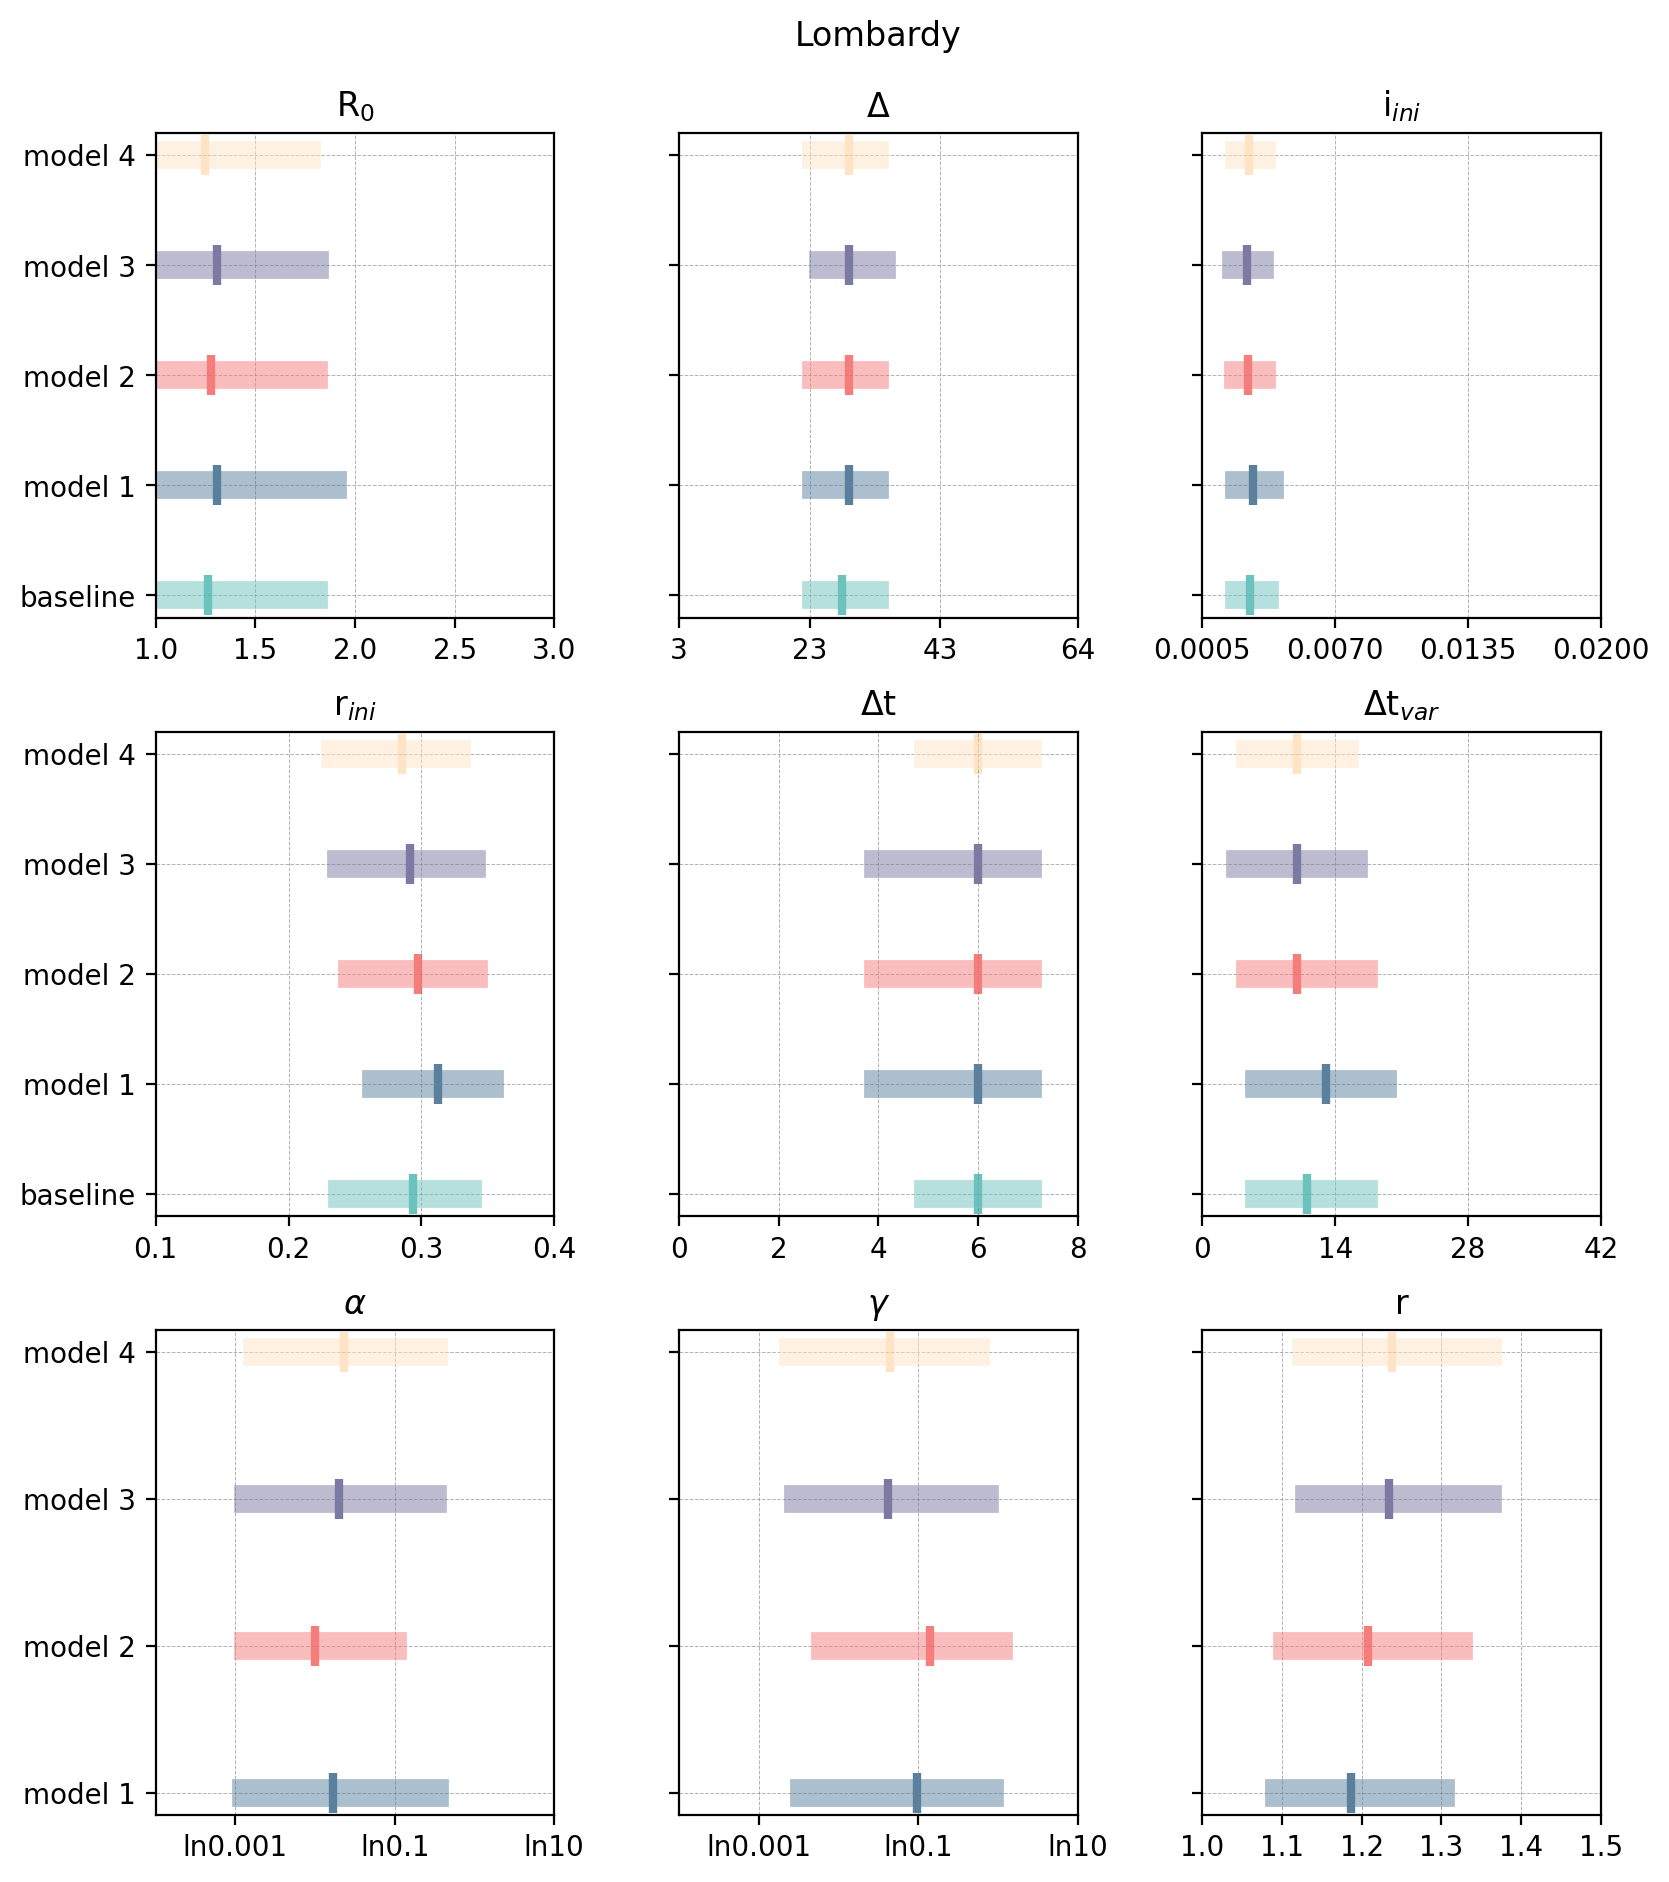

In [4]:
region='Lombardy'
files = os.listdir(path)
files = [file for file in files if ".csv" in file and region in file]
fig, axes = plt.subplots(ncols=3, nrows=3, dpi=200, figsize=(8,9))
fig.tight_layout(h_pad=2)
colors = ['#6CC2BD', '#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4', \
          '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
models = [ "baseline", "model 1", "model 2", "model 3", "model 4"]

i=0
for file in files:
    pos=pd.read_csv(f"{path}/{file}")
    D=pos['Delta']
    R0=pos['R0']
    r0=pos['r0_q']
    i0=pos['i0_q']
    t0=8-pos['start_week_delta']
    t_alpha=42-pos['t_alpha_delta']
    
    Q1, Q3 = np.quantile(R0, q=0.25), np.quantile(R0, q=0.75)
    Q1, Q3 = np.quantile(R0, q=0.05), np.quantile(R0, q=0.95)
    IQR    = Q3 - Q1
    axes[0][0].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[0][0].scatter([np.median(R0)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    Q1, Q3 = np.quantile(D, q=0.25), np.quantile(D, q=0.75)
    Q11, Q33 = np.quantile(D, q=0.05), np.quantile(D, q=0.95)
    IQR    = Q3 - Q1
    axes[0][1].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[0][1].scatter([np.median(D)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(i0, q=0.25), np.quantile(i0, q=0.75)
    Q11, Q33 = np.quantile(i0, q=0.05), np.quantile(i0, q=0.95)
    IQR    = Q3 - Q1
    axes[0][2].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[0][2].scatter([np.median(i0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(r0, q=0.25), np.quantile(r0, q=0.75)
    Q11, Q33 = np.quantile(r0, q=0.05), np.quantile(r0, q=0.95)
    IQR    = Q3 - Q1
    axes[1][0].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[1][0].scatter([np.median(r0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(t0, q=0.25), np.quantile(t0, q=0.75)
    Q11, Q33 = np.quantile(t0, q=0.05), np.quantile(t0, q=0.95)
    IQR    = Q3 - Q1
    axes[1][1].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[1][1].scatter([np.median(t0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(t_alpha, q=0.25), np.quantile(t_alpha, q=0.75)
    Q11, Q33 = np.quantile(t_alpha, q=0.05), np.quantile(t_alpha, q=0.95)
    IQR    = Q3 - Q1
    axes[1][2].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[1][2].scatter([np.median(t_alpha)], [i], color=colors[i], marker="|", s=200, linewidth=3)    
    i+=1
axes[0][0].set_title("R$_0$")
axes[0][1].set_title("$\\Delta$")
axes[0][2].set_title("i$_{ini}$")
axes[1][0].set_title("r$_{ini}$")
axes[1][1].set_title("$\Delta$t")
axes[1][2].set_title("$\Delta$t$_{var}$")

axes[0][0].set_xlim(1.0, 3.0)
axes[0][1].set_xlim(3, 64)
axes[0][2].set_xlim(5*10**(-4), 2*10**(-2))
axes[1][0].set_xlim(0.1, 0.4)
axes[1][1].set_xlim(0,8)
axes[1][2].set_xlim(0,42)

axes[0][1].set_xticks([3, 23, 43, 64])
axes[0][2].set_xticks([5*10**(-4), 0.0070, 0.0135, 2*10**(-2)])
axes[1][0].set_xticks([0.1, 0.2, 0.3, 0.4])
axes[1][1].set_xticks([0,2,4,6,8])
axes[1][2].set_xticks([0, 14, 28, 42])
for i in range(0,2):
    for j in range(1,3):
        axes[i][j].set_yticks([0,1,2,3,4])
        axes[i][j].set_yticklabels('')
axes[0][0].set_yticks([0,1,2,3,4])
axes[1][0].set_yticks([0,1,2,3,4])
#axes[i].set_yticklabels('')
axes[0][0].set_yticklabels(models)
axes[1][0].set_yticklabels(models)


files  = os.listdir(path)
files = [file for file in files if ".csv" in file and region in file and "_06_" not in file]

colors = ['#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4', \
          '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
models = ["model 1", "model 2", "model 3", "model 4"]

i=0
for file in files:
    pos=pd.read_csv(f"{path}/{file}")
    alpha=pos['alpha']
    gamma=pos['gamma']
    r=pos['r']

    Q1, Q3 = np.quantile(alpha, q=0.25), np.quantile(alpha, q=0.75)
    Q11, Q33 = np.quantile(alpha, q=0.05), np.quantile(alpha, q=0.95)
    IQR    = Q3 - Q1
    axes[2][0].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[2][0].scatter([np.median(alpha)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    Q1, Q3 = np.quantile(gamma, q=0.25), np.quantile(gamma, q=0.75)
    Q11, Q33 = np.quantile(gamma, q=0.05), np.quantile(gamma, q=0.95)
    IQR    = Q3 - Q1
    axes[2][1].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[2][1].scatter([np.median(gamma)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    Q1, Q3 = np.quantile(r, q=0.25), np.quantile(r, q=0.75)
    Q11, Q33 = np.quantile(r, q=0.05), np.quantile(r, q=0.95)
    IQR    = Q3 - Q1
    axes[2][2].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[2][2].scatter([np.median(r)], [i], color=colors[i], marker="|", s=200, linewidth=3)    
    i+=1
    
axes[2][0].set_title("$\\alpha$")
axes[2][1].set_title("$\\gamma$")
axes[2][2].set_title("r")

axes[2][0].set_xlim(math.log(0.0001), math.log(10))
axes[2][1].set_xlim(math.log(0.0001), math.log(10))
axes[2][2].set_xlim(1.0, 1.5)


xticks = [np.log(0.001), np.log(0.1), np.log(10)]
xtick_labels = ['ln0.001', 'ln0.1', 'ln10']

axes[2][0].set_xticks(xticks)
axes[2][0].set_xticklabels(xtick_labels)
axes[2][1].set_xticks(xticks)
axes[2][1].set_xticklabels(xtick_labels)

axes[2][2].set_xticks([1.0, 1.1, 1.2, 1.3, 1.4, 1.5])


for i in range(1,3):
    axes[2][i].set_yticks([0,1,2,3]) # 设置刻度
    axes[2][i].set_yticklabels('')
axes[2][0].set_yticks([0,1,2,3]) # 设置刻度
axes[2][0].set_yticklabels('')
axes[2][0].set_yticklabels(models)

for i in range(0,3):
    for j in range(0,3):
        axes[i][j].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
axes[0][1].annotate("Lombardy", xy=(0.5, 1.2), xycoords='axes fraction', fontsize=12, va='center', ha='center')
plt.savefig(r'.\figures\pos_lom.pdf', bbox_inches="tight")

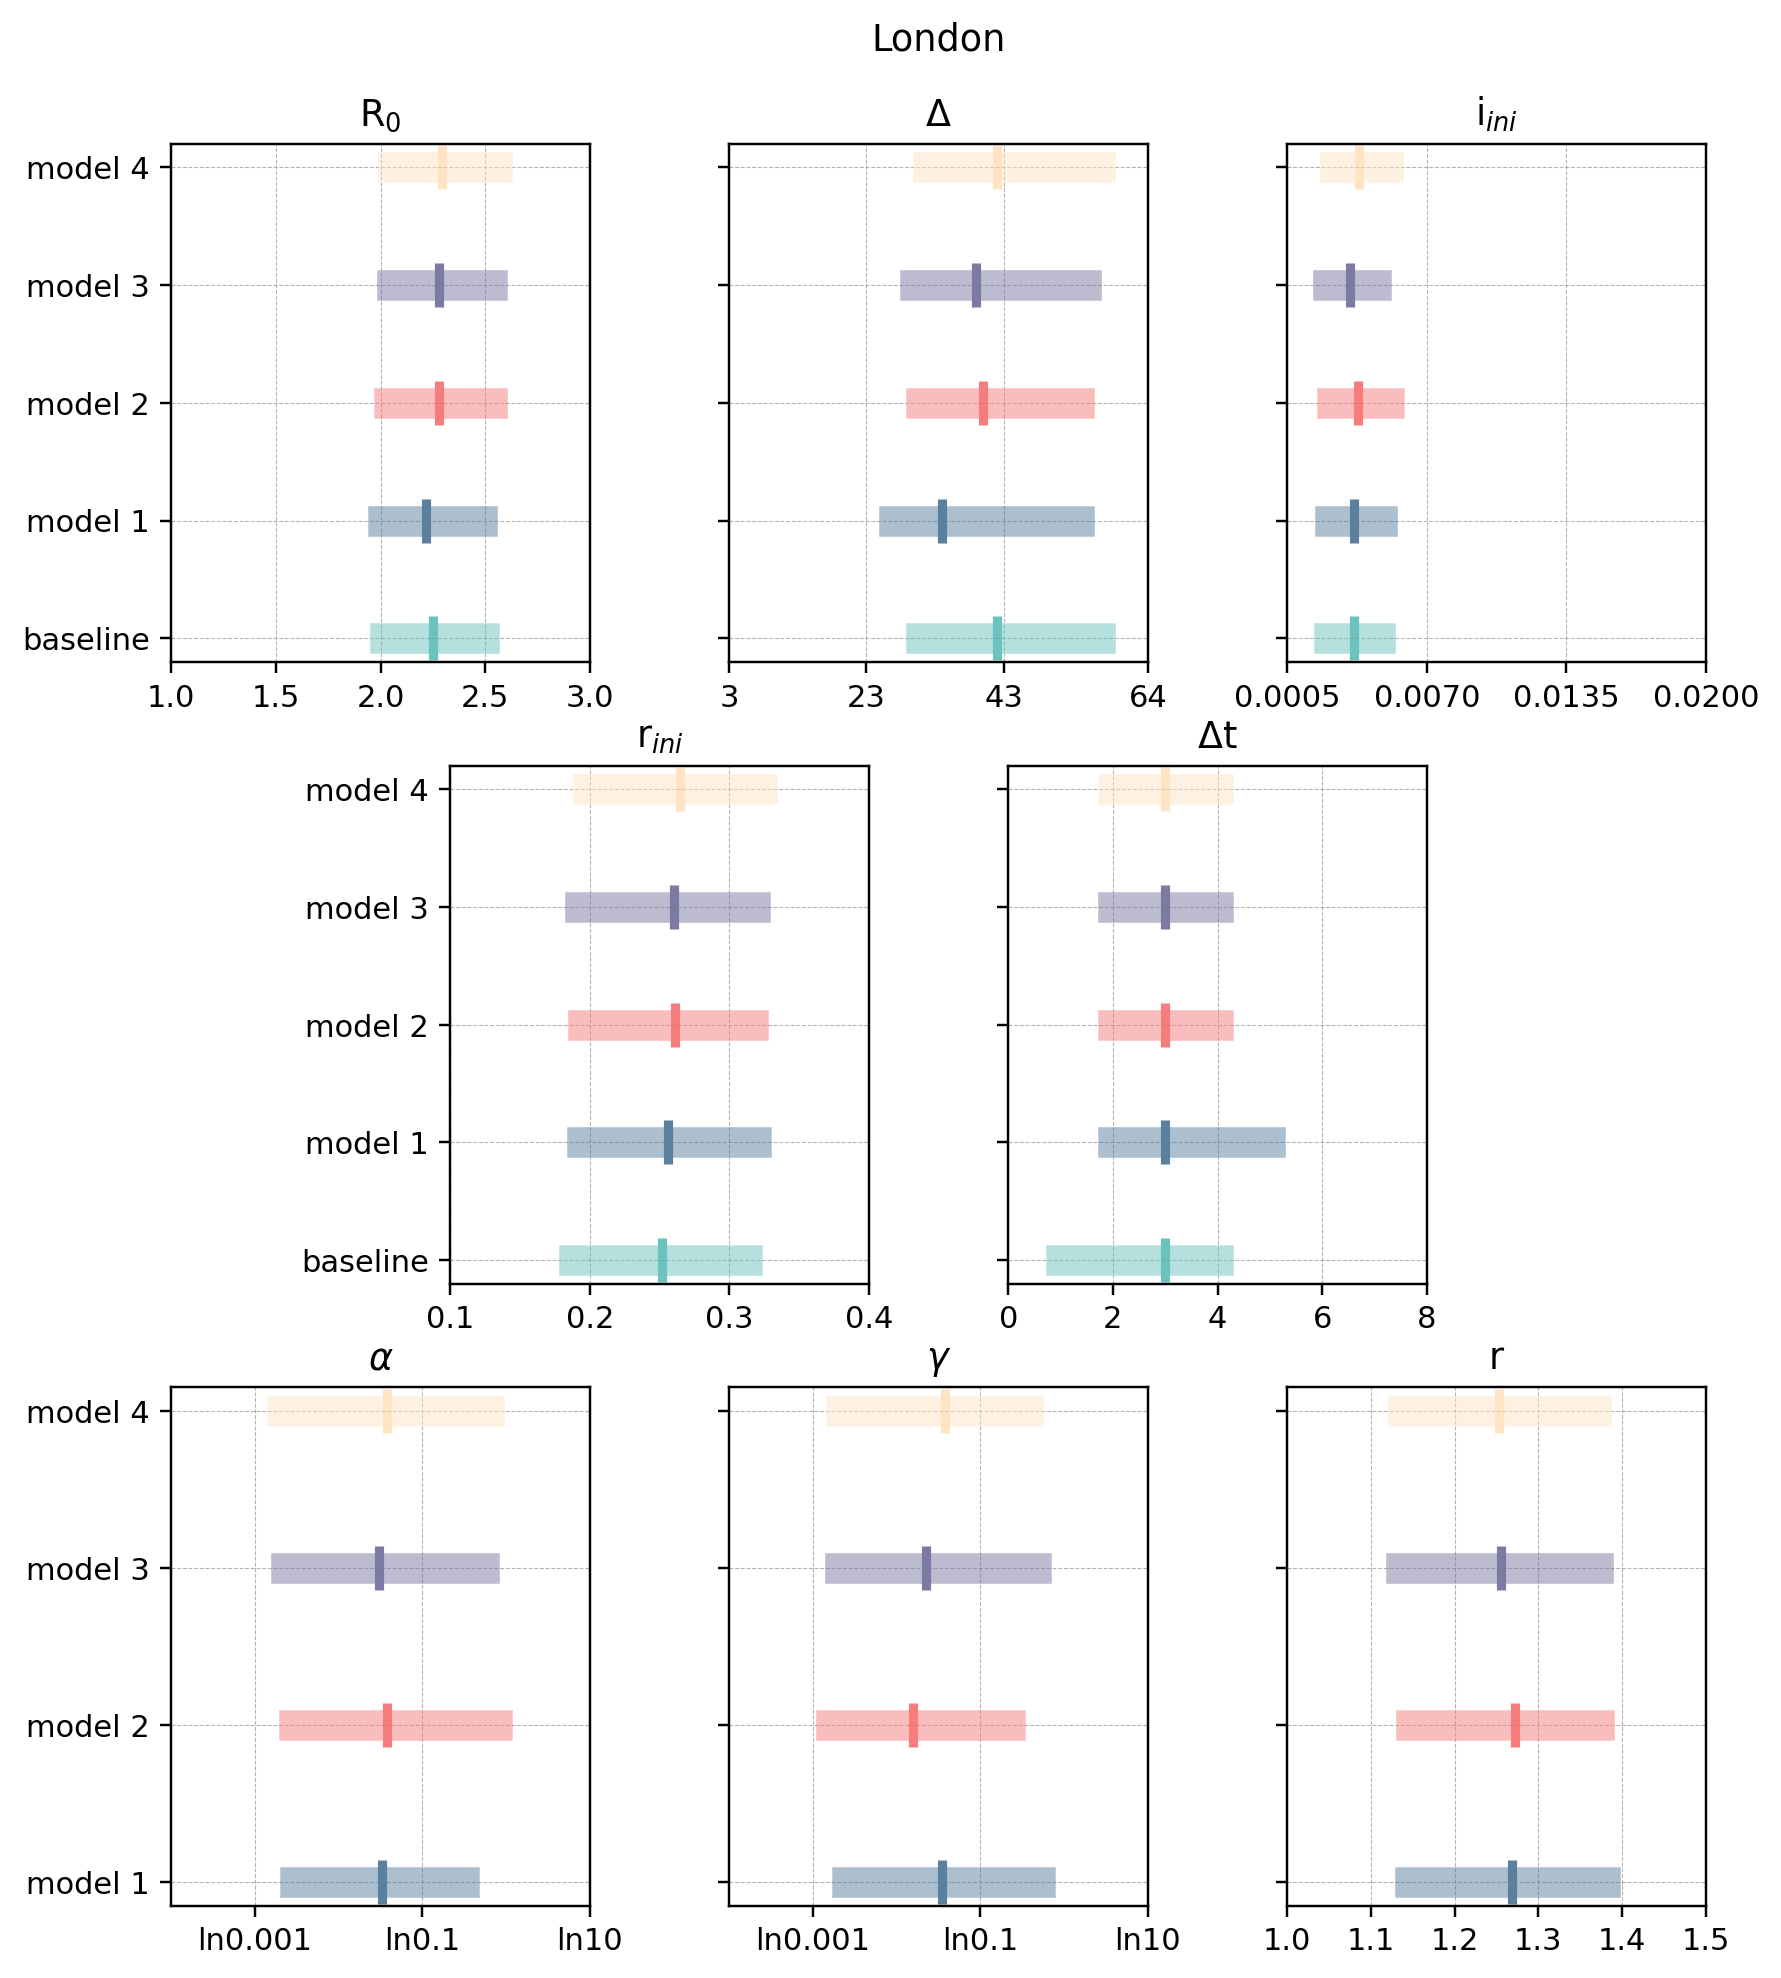

In [5]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create the figure and a 3x6 GridSpec layout
fig = plt.figure(dpi=220, figsize=(9, 10.4))
gs = GridSpec(3, 6, figure=fig)
gs.update(wspace=1, hspace=0.2)  # Adjust spacing between subplots

# Add subplots in the GridSpec layout
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])
ax6 = fig.add_subplot(gs[2, 0:2])
ax7 = fig.add_subplot(gs[2, 2:4])
ax8 = fig.add_subplot(gs[2, 4:6])

region='London'
files  = os.listdir(path)
files=[file for file in files if ".csv" in file and region in file]

colors = ['#6CC2BD', '#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4', \
          '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
models = [ "baseline", "model 1", "model 2", "model 3", "model 4"]
i=0
for file in files:
    pos=pd.read_csv(f"{path}/{file}")
    D=pos['Delta']
    R0=pos['R0']
    r0=pos['r0_q']
    i0=pos['i0_q']
    t0=pos['start_week_delta']

    Q1, Q3 = np.quantile(R0, q=0.25), np.quantile(R0, q=0.75)
    IQR    = Q3 - Q1
    ax1.plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    ax1.scatter([np.median(R0)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    Q1, Q3 = np.quantile(D, q=0.25), np.quantile(D, q=0.75)
    IQR    = Q3 - Q1
    ax2.plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    ax2.scatter([np.median(D)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(i0, q=0.25), np.quantile(i0, q=0.75)
    IQR    = Q3 - Q1
    ax3.plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    ax3.scatter([np.median(i0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(r0, q=0.25), np.quantile(r0, q=0.75)
    IQR    = Q3 - Q1
    ax4.plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    ax4.scatter([np.median(r0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(t0, q=0.25), np.quantile(t0, q=0.75)
    IQR    = Q3 - Q1
    ax5.plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    ax5.scatter([np.median(t0)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    
    i+=1
ax1.set_title("R$_0$")
ax2.set_title("$\\Delta$")
ax3.set_title("i$_{ini}$")
ax4.set_title("r$_{ini}$")
ax5.set_title("$\Delta$t")

ax1.set_xlim(1.0, 3.0)
ax2.set_xlim(3, 64)
ax3.set_xlim(5*10**(-4), 2*10**(-2))
ax4.set_xlim(0.1, 0.4)
ax5.set_xlim(0,8)

ax2.set_xticks([3, 23, 43, 64])
ax3.set_xticks([5*10**(-4), 0.0070, 0.0135, 2*10**(-2)])
ax4.set_xticks([0.1, 0.2, 0.3, 0.4])

ax1.set_yticks([0,1,2,3,4])
ax2.set_yticks([0,1,2,3,4])
ax3.set_yticks([0,1,2,3,4])
ax4.set_yticks([0,1,2,3,4])
ax5.set_yticks([0,1,2,3,4])
ax1.set_yticklabels('')
ax2.set_yticklabels('')
ax3.set_yticklabels('')
ax4.set_yticklabels('')
ax5.set_yticklabels('')


ax1.set_yticks([0,1,2,3,4]) # 设置刻度
#axes[i].set_yticklabels('')
ax1.set_yticklabels(models)
ax4.set_yticks([0,1,2,3,4]) # 设置刻度
#axes[i].set_yticklabels('')
ax4.set_yticklabels(models)

files  = os.listdir(path)
files = [file for file in files if ".csv" in file and region in file and "_06_" not in file]

colors = ['#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4', \
          '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
models = ["model 1", "model 2", "model 3", "model 4"]

i=0
for file in files:
    pos=pd.read_csv(f"{path}/{file}")
    alpha=pos['alpha']
    gamma=pos['gamma']
    r=pos['r']

    Q1, Q3 = np.quantile(alpha, q=0.25), np.quantile(alpha, q=0.75)
    Q11, Q33 = np.quantile(alpha, q=0.05), np.quantile(alpha, q=0.95)
    IQR    = Q3 - Q1
    ax6.plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    ax6.scatter([np.median(alpha)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    Q1, Q3 = np.quantile(gamma, q=0.25), np.quantile(gamma, q=0.75)
    Q11, Q33 = np.quantile(gamma, q=0.05), np.quantile(gamma, q=0.95)
    IQR    = Q3 - Q1
    ax7.plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    ax7.scatter([np.median(gamma)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(r, q=0.25), np.quantile(r, q=0.75)
    Q11, Q33 = np.quantile(r, q=0.05), np.quantile(r, q=0.95)
    IQR    = Q3 - Q1
    ax8.plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    ax8.scatter([np.median(r)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    i+=1
    
ax6.set_title("$\\alpha$")
ax7.set_title("$\\gamma$")
ax8.set_title("r")
ax6.set_xlim(0.0001,2)
ax7.set_xlim(0.0001,1.2)
ax8.set_xlim(1.0, 1.5)
# ax6.set_xticks([0.1,25, 50, 75, 100])
# ax7.set_xticks([0.1,25, 50, 75, 100])
ax8.set_xticks([1.0, 1.1, 1.2, 1.3, 1.4, 1.5])


ax6.set_xlim(math.log(0.0001), math.log(10))
ax7.set_xlim(math.log(0.0001), math.log(10))

xticks = [np.log(0.001), np.log(0.1), np.log(10)]
xtick_labels = ['ln0.001', 'ln0.1', 'ln10']

ax6.set_xticks(xticks)
ax6.set_xticklabels(xtick_labels)
ax7.set_xticks(xticks)
ax7.set_xticklabels(xtick_labels)

ax6.set_yticks([0,1,2,3])
ax7.set_yticks([0,1,2,3])
ax8.set_yticks([0,1,2,3])
ax6.set_yticklabels('')
ax7.set_yticklabels('')
ax8.set_yticklabels('')

ax6.set_yticks([0,1,2,3])
ax6.set_yticklabels('')
ax6.set_yticklabels(models)

axes=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(0,8):
        axes[i].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
ax2.annotate("London", xy=(0.5, 1.2), xycoords='axes fraction', fontsize=12, va='center', ha='center')
plt.savefig(r'.\figures\pos_ld.pdf', bbox_inches="tight")

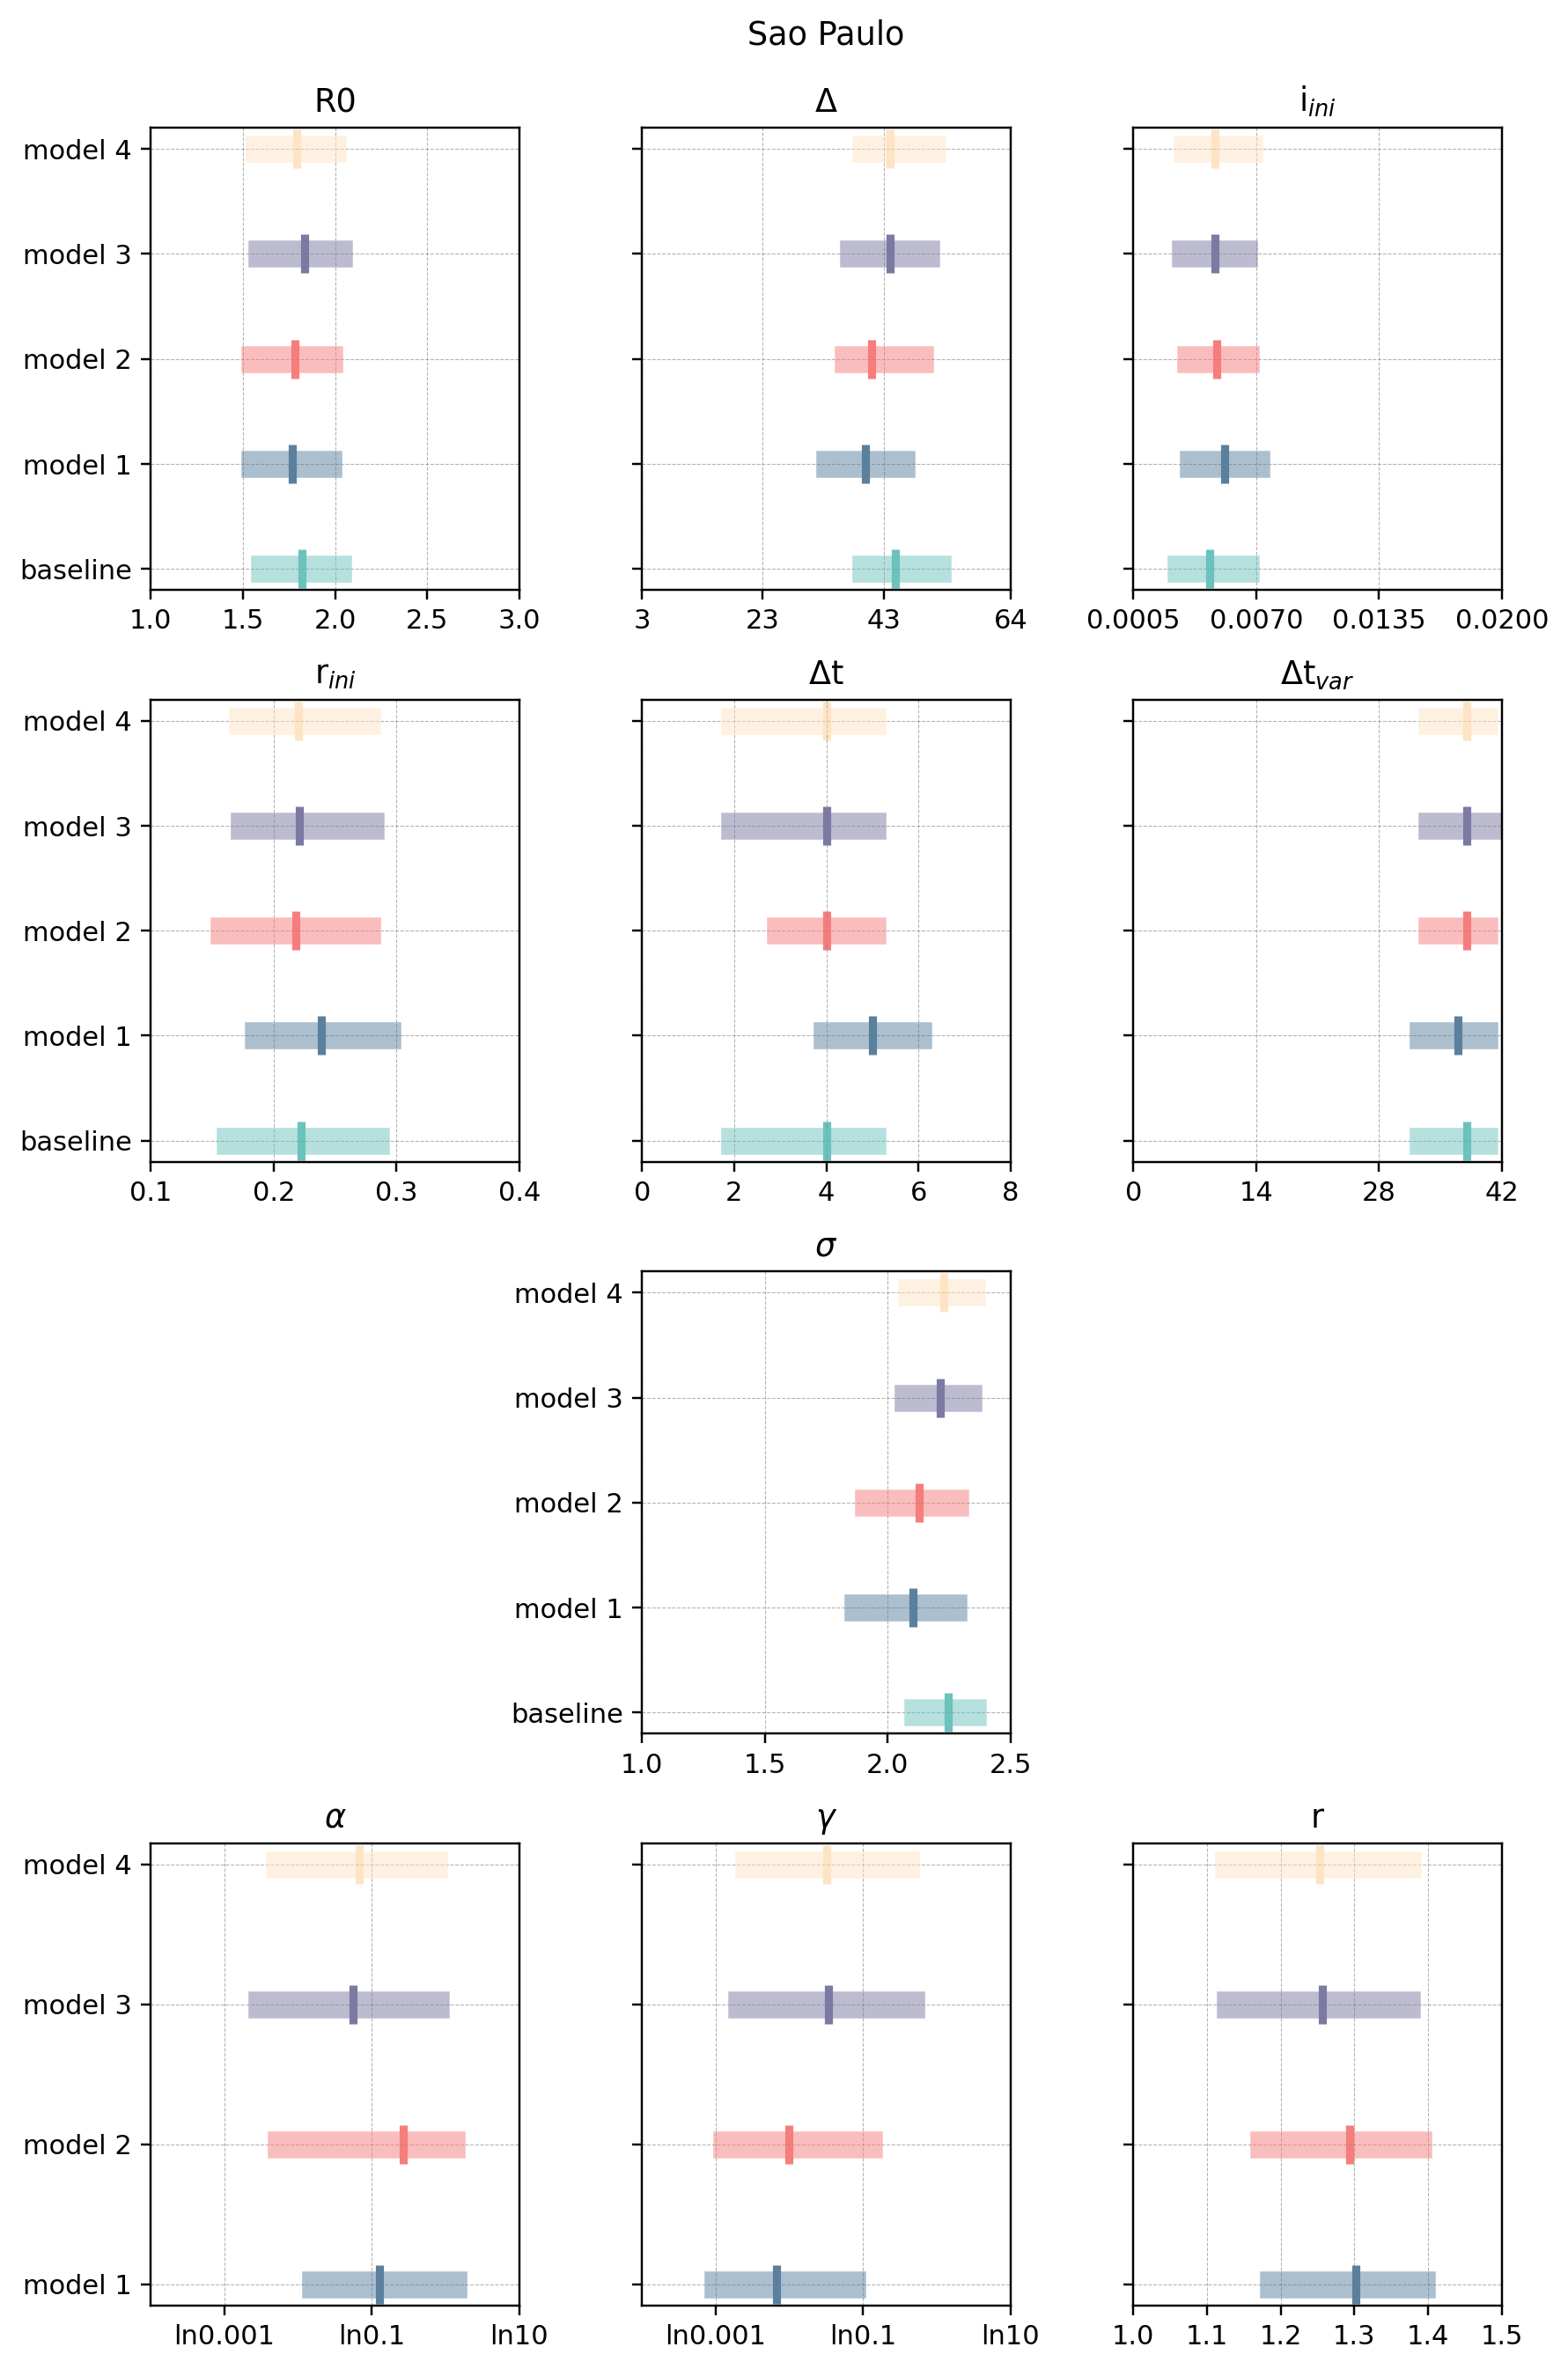

In [6]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create the figure and a 3x6 GridSpec layout
fig = plt.figure(dpi=220, figsize=(9, 14.6))
gs = GridSpec(4, 6, figure=fig)
gs.update(wspace=1, hspace=0.238)  # Adjust spacing between subplots

# Add subplots in the GridSpec layout
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
ax4 = fig.add_subplot(gs[1, 0:2])
ax5 = fig.add_subplot(gs[1, 2:4])
ax6 = fig.add_subplot(gs[1, 4:6])
ax7 = fig.add_subplot(gs[2, 2:4])
ax8 = fig.add_subplot(gs[3, 0:2])
ax9 = fig.add_subplot(gs[3, 2:4])
ax10 = fig.add_subplot(gs[3, 4:6])

axes=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

region='Sao Paulo'
files  = os.listdir(path)
files=[file for file in files if ".csv" in file and region in file]

colors = ['#6CC2BD', '#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4', \
          '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
models = [ "baseline", "model 1", "model 2", "model 3", "model 4"]

i=0
for file in files:
    pos=pd.read_csv(f"{path}/{file}")
    D=pos['Delta']
    R0=pos['R0']
    r0=pos['r0_q']
    i0=pos['i0_q']
    t0=8-pos['start_week_delta']
    t_alpha=42-pos['t_alpha_delta']
    Alpha_increase=pos['Alpha_increase']
    Q1, Q3 = np.quantile(R0, q=0.25), np.quantile(R0, q=0.75)
    IQR    = Q3 - Q1
    axes[0].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[0].scatter([np.median(R0)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    Q1, Q3 = np.quantile(D, q=0.25), np.quantile(D, q=0.75)
    IQR    = Q3 - Q1
    axes[1].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[1].scatter([np.median(D)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(i0, q=0.25), np.quantile(i0, q=0.75)
    IQR    = Q3 - Q1
    axes[2].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[2].scatter([np.median(i0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(r0, q=0.25), np.quantile(r0, q=0.75)
    IQR    = Q3 - Q1
    axes[3].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[3].scatter([np.median(r0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(t0, q=0.25), np.quantile(t0, q=0.75)
    IQR    = Q3 - Q1
    axes[4].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[4].scatter([np.median(t0)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(t_alpha, q=0.25), np.quantile(t_alpha, q=0.75)
    IQR    = Q3 - Q1
    axes[5].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[5].scatter([np.median(t_alpha)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(Alpha_increase, q=0.25), np.quantile(Alpha_increase, q=0.75)
    IQR    = Q3 - Q1
    axes[6].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[6].scatter([np.median(Alpha_increase)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    i+=1
axes[0].set_title("R0")
axes[1].set_title("$\\Delta$")
axes[2].set_title("i$_{ini}$")
axes[3].set_title("r$_{ini}$")
axes[4].set_title("$\Delta$t")
axes[5].set_title("$\Delta$t$_{var}$")
axes[6].set_title("$\sigma$")

axes[0].set_xlim(1.0, 3.0)
axes[1].set_xlim(3, 64)
axes[2].set_xlim(5*10**(-4), 2*10**(-2))
axes[3].set_xlim(0.1, 0.4)
axes[4].set_xlim(0,8)
axes[5].set_xlim(0,42)
axes[6].set_xlim(1, 2.5)


axes[1].set_xticks([3, 23, 43, 64])
axes[2].set_xticks([5*10**(-4), 0.0070, 0.0135, 2*10**(-2)])
axes[5].set_xticks([0, 14, 28, 42])
for i in range(0,7):
    axes[i].set_yticks([0,1,2,3,4])
    axes[i].set_yticklabels('')

axes[0].set_yticks([0,1,2,3,4])
axes[0].set_yticklabels(models)
axes[3].set_yticks([0,1,2,3,4])
axes[3].set_yticklabels(models)
axes[6].set_yticks([0,1,2,3,4])
axes[6].set_yticklabels(models)

files  = os.listdir(path)
files = [file for file in files if ".csv" in file and region in file and "_06_" not in file]

colors = ['#5A809E', '#F57D7C', '#7C79A2', '#FEE4C4', \
          '#FFC1A6', '#acc2d9', '#c5c9c7', '#a8415b', '#b1d1fc']
models = ["model 1", "model 2", "model 3", "model 4"]

i=0
for file in files:
    pos=pd.read_csv(f"{path}/{file}")
    alpha=pos['alpha']
    gamma=pos['gamma']
    r=pos['r']

    Q1, Q3 = np.quantile(alpha, q=0.25), np.quantile(alpha, q=0.75)
    Q11, Q33 = np.quantile(alpha, q=0.05), np.quantile(alpha, q=0.95)
    IQR    = Q3 - Q1
    axes[7].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[7].scatter([np.median(alpha)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    
    Q1, Q3 = np.quantile(gamma, q=0.25), np.quantile(gamma, q=0.75)
    Q11, Q33 = np.quantile(gamma, q=0.05), np.quantile(gamma, q=0.95)
    IQR    = Q3 - Q1
    axes[8].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[8].scatter([np.median(gamma)], [i], color=colors[i], marker="|", s=200, linewidth=3)

    Q1, Q3 = np.quantile(r, q=0.25), np.quantile(r, q=0.75)
    Q11, Q33 = np.quantile(r, q=0.05), np.quantile(r, q=0.95)
    IQR    = Q3 - Q1
    axes[9].plot([Q1, Q3], [i,i], linewidth=10, color=colors[i], alpha=0.5)
    axes[9].scatter([np.median(r)], [i], color=colors[i], marker="|", s=200, linewidth=3)
    i+=1
    
axes[7].set_title("$\\alpha$")
axes[8].set_title("$\\gamma$")
axes[9].set_title("r")
axes[7].set_xlim(0.0001,2)
axes[8].set_xlim(0.0001,1.2)
axes[9].set_xlim(1.0, 1.5)


axes[7].set_xlim(math.log(0.0001), math.log(10))
axes[8].set_xlim(math.log(0.0001), math.log(10))

xticks = [np.log(0.001), np.log(0.1), np.log(10)]
xtick_labels = ['ln0.001', 'ln0.1', 'ln10']

axes[7].set_xticks(xticks)
axes[7].set_xticklabels(xtick_labels)
axes[8].set_xticks(xticks)
axes[8].set_xticklabels(xtick_labels)
axes[9].set_xticks([1.0, 1.1, 1.2, 1.3, 1.4, 1.5])
for i in range(7,10):
    axes[i].set_yticks([0,1,2,3])
    axes[i].set_yticklabels('')

axes[7].set_yticks([0,1,2,3])
axes[7].set_yticklabels('')
axes[7].set_yticklabels(models)

for i in range(0,10):
        axes[i].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
ax2.annotate("Sao Paulo", xy=(0.5, 1.2), xycoords='axes fraction', fontsize=12, va='center', ha='center')
plt.savefig(r'.\figures\pos_sp.pdf', bbox_inches="tight")